In [1]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch
from rich import print
from scib_metrics.benchmark import Benchmarker

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [ ]:
# 检查每个AnnData对象的var_names是否唯一，并移除重复的基因名
for adata in adata_list:
    if adata.var_names.duplicated().any():
        print(f"Duplicate gene names found in {adata}. Removing duplicates.")
        adata.var_names_make_unique()

# 提取所有AnnData对象的基因名
all_vars = [adata.var_names for adata in adata_list]

# 找到所有AnnData对象中共同的基因名
common_vars = set(all_vars[0]).intersection(*all_vars[1:])

# 重新索引每个AnnData对象的var
for adata in adata_list:
    adata = adata[:, list(common_vars)].copy()

Duplicate gene names found in AnnData object with n_obs × n_vars = 2673 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 3385 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 3597 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 2427 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_

In [ ]:
# 检查每个AnnData对象的var_names是否唯一，并移除重复的基因名
for adata in adata_list:
    if adata.var_names.duplicated().any():
        print(f"Duplicate gene names found in {adata}. Removing duplicates.")
        adata.var_names_make_unique()

# 提取所有AnnData对象的基因名
all_vars = [adata.var_names for adata in adata_list]

# 找到所有AnnData对象中共同的基因名
common_vars = set(all_vars[0]).intersection(*all_vars[1:])

# 重新索引每个AnnData对象的var
for adata in adata_list:
    adata = adata[:, list(common_vars)].copy()

Duplicate gene names found in AnnData object with n_obs × n_vars = 2673 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 3385 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 3597 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_vars = 2427 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'. Removing duplicates.
Duplicate gene names found in AnnData object with n_obs × n_

In [2]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/immune.h5ad')
adata = adata.copy()

In [3]:
adata.obs['minor'] = adata.obs['minor'].cat.add_categories('NaN').fillna('NaN')

In [4]:
print(adata.obs['minor'].value_counts())

minor
NaN                 628545
Plasma               18166
MB_NR4A1             10889
Mono_VEGFA            9235
Treg                  7950
CD4_TCF7              7567
Macro_CHI3L1          7141
Macro_SELENOP         6735
MB_TXNIP              6602
CD4_NR4A2             6562
CD8_GZMK              6015
CD8_HAVCR2            5881
Macro_CXCL9           5786
AM                    5725
Macro_CCL18           5456
Macro_CXCL3           5191
NK_GNLY               3743
CD4_CXCL13            3574
Mast                  3218
Macro_SPP1            2983
Neutrophil            2771
CD8_IFNG              2611
MB_FCRL4              2336
MRC1+ cDC2            2062
NK_FCGR3A             1977
Pericyte              1773
Mono_FCGR3A           1766
MRC1+IL1B+ cDC2       1468
Naive B               1331
pDC                    968
Cycling T              948
cDC1                   651
mregDC                 631
GC B                   600
LTB+ cDC2              449
CD1A+CD207+ cDC2       294
Cycling B              274
CCL3L1+ cDC2           170
CD1C+ mregDC           125
ILC                     77
Name: count, dtype: int64

In [5]:
print(adata.obs['Dataset'].value_counts())

Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Guo_Zhang_2018                        1779
Name: count, dtype: int64

In [6]:
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat",
    n_top_genes=2000,
    subset=True,
    inplace=True,batch_key="Dataset")

In [7]:
print(adata.obs['Dataset'].value_counts())

# 将多个数据集名称放入列表中
selected_datasets = ['Ansuman_Satpathy_2023', 'Goveia_Carmeliet_2020', 
       'He_Fan_2021', 'Kim_Lee_2020', 'Lambrechts_Thienpont_2018_6149v1',
       'Lambrechts_Thienpont_2018_6149v2', 'Lambrechts_Thienpont_2018_6653',
       'Laughney_Massague_2020', 'Maynard_Bivona_2020', 'Peng_Zhang_2024',
       'Tagore_S_2025', 'Travaglini_Krasnow_2020', 'UKIM-V',
       'Vieira_Teichmann_2019']
adata = adata[adata.obs['Dataset'].isin(selected_datasets)]

print(adata.obs['Dataset'].value_counts())

Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Guo_Zhang_2018                        1779
Name: count, dtype: int64

Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Name: count, dtype: int64

In [8]:
adata = adata.copy()
scvi.model.SCVI.setup_anndata(adata,  batch_key="Dataset",layer='counts')

In [9]:
model = scvi.model.SCVI(adata, n_layers=3, n_latent=40, gene_likelihood="nb",dispersion='gene-batch')

In [10]:
model.train(max_epochs=100,batch_size=128)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bo

Epoch 100/100: 100%|██████████| 100/100 [1:28:23<00:00, 52.17s/it, v_num=1, train_loss_step=442, train_loss_epoch=451]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:28:23<00:00, 53.03s/it, v_num=1, train_loss_step=442, train_loss_epoch=451]


In [11]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [12]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="minor",
    unlabeled_category="NaN"
    
)

In [13]:
scanvi_model.train()

INFO     Training for 4 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 4/4: 100%|██████████| 4/4 [08:13<00:00, 122.55s/it, v_num=1, train_loss_step=449, train_loss_epoch=472]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|██████████| 4/4 [08:13<00:00, 123.43s/it, v_num=1, train_loss_step=449, train_loss_epoch=472]


In [14]:
model_fix_linear = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="minor",
    unlabeled_category="NaN",
    linear_classifier=True,
)
model_fix_linear.train()

INFO     Training for 4 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 4/4: 100%|██████████| 4/4 [07:29<00:00, 113.62s/it, v_num=1, train_loss_step=693, train_loss_epoch=474]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|██████████| 4/4 [07:29<00:00, 112.42s/it, v_num=1, train_loss_step=693, train_loss_epoch=474]


In [15]:
model_fix = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="minor",
    unlabeled_category="NaN",
)
model_fix.train()

INFO     Training for 4 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 4/4: 100%|██████████| 4/4 [08:12<00:00, 122.94s/it, v_num=1, train_loss_step=433, train_loss_epoch=472]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|██████████| 4/4 [08:12<00:00, 123.07s/it, v_num=1, train_loss_step=433, train_loss_epoch=472]


In [16]:
model_no_fix = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="minor",
    unlabeled_category="NaN",
    classifier_parameters={"logits": False},
)
model_no_fix.train()

INFO     Training for 4 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 4/4: 100%|██████████| 4/4 [08:16<00:00, 124.14s/it, v_num=1, train_loss_step=553, train_loss_epoch=596]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|██████████| 4/4 [08:16<00:00, 124.20s/it, v_num=1, train_loss_step=553, train_loss_epoch=596]


In [17]:
import matplotlib.pyplot as plt
def plot_classification_metrics(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10.5, 7), sharey=False, sharex=True)

    def plot_metric(ax, metric, model, title, ylim, lw=1.25):
        ax.plot(
            model.history[f"train_{metric}"],
            label="train",
            color="darkgreen",
            linewidth=lw,
        )
        ax.plot(
            model.history[f"validation_{metric}"],
            label="validation",
            color="firebrick",
            linewidth=lw,
        )
        ax.set_ylim(ylim)
        ax.legend()
        ax.set_title(title)

    metrics = ["classification_loss", "calibration_error", "accuracy"]
    ylims = [(-0.1, 2.3), (-0.01, 0.18), (0.8, 1.0)]
    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]

    for i, (metric, ylim) in enumerate(zip(metrics, ylims, strict=False)):
        for j, (model, model_name) in enumerate(zip(models, model_names, strict=False)):
            plot_metric(axes[i, j], metric, model, model_name, ylim=ylim)

    fig.text(-0.01, 0.8, "Classification loss", va="center", rotation="vertical")
    fig.text(-0.01, 0.5, "Calibration error", va="center", rotation="vertical")
    fig.text(-0.01, 0.2, "Accuracy", va="center", rotation="vertical")
    fig.text(0.5, -0.01, "Epoch", ha="center")
    fig.tight_layout()

KeyError: 'validation_classification_loss'

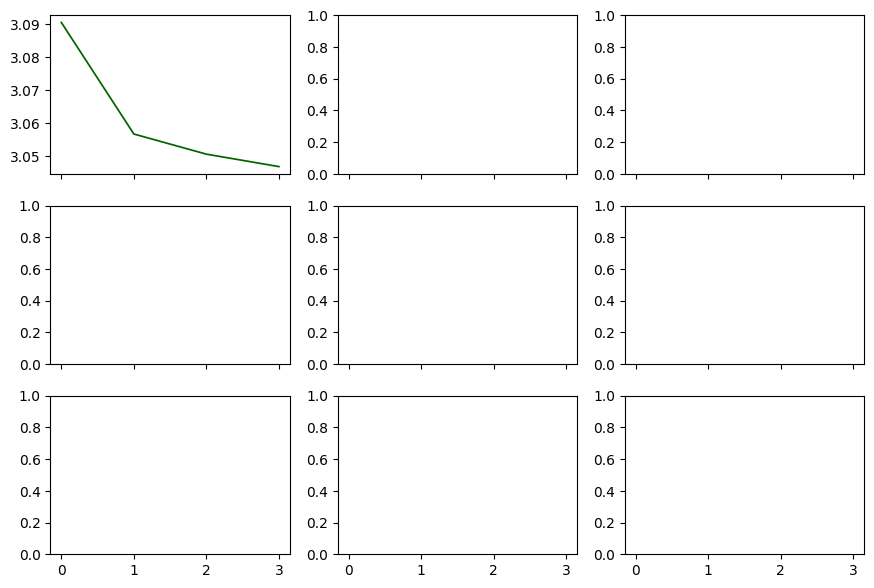

In [18]:
plot_classification_metrics( model_no_fix, model_fix,model_fix_linear)

In [19]:
import numpy as np
def plot_confusion_matrices(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
    subset: str | None = None,
    prediction_key: str = "_prediction",
    labels_key: str = "minor",
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6.375), sharey=False, sharex=False)

    def plot_confusion_matrix(ax, model, title, subset):
        adata = model.adata
        adata.obs[prediction_key] = model.predict()

        if subset == "validation":
            adata = adata[model.validation_indices].copy()
        elif subset == "train":
            adata = adata[model.train_indices].copy()

        df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
        conf_mat = df / df.sum(axis=1).values[:, np.newaxis]

        _ = ax.pcolor(conf_mat, cmap="cividis", vmin=0, vmax=1)
        _ = ax.set_xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation=90)
        _ = ax.set_yticks(np.arange(0.5, len(df.index), 1), df.index)
        ax.set_title(title)

    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]

    for model, model_name, ax in zip(models, model_names, axes, strict=False):
        plot_confusion_matrix(ax, model, model_name, subset)

    fig.text(0.0, 0.5, "Observed", va="center", rotation="vertical")
    fig.text(0.5, 0.0, "Predicted", ha="center")
    fig.tight_layout()

/tmp/ipykernel_2557852/3373622046.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
/tmp/ipykernel_2557852/3373622046.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata.obs.groupby([labels_key, prediction_key]).size().unstack(fill_value=0)
/tmp/ipykernel_2557852/3373622046.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

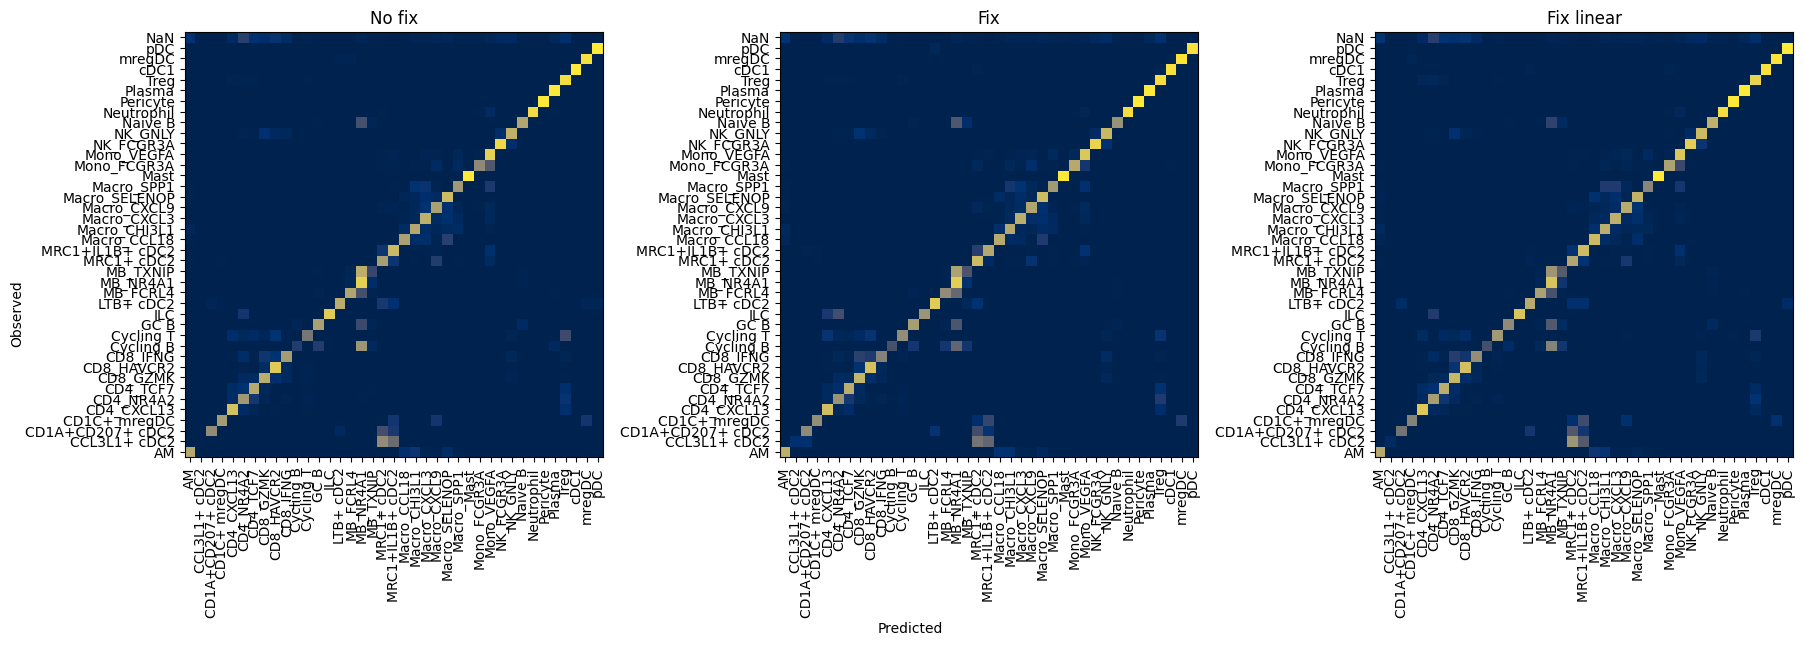

In [20]:
plot_confusion_matrices( scanvi_model, model_fix,model_fix_linear,subset='validation')

In [21]:
def plot_latent_umaps(
    model_no_fix: scvi.model.SCANVI,
    model_fix: scvi.model.SCANVI,
    model_fix_linear: scvi.model.SCANVI,
    color: list | str | None = None,
    subset: str | None = None,
    latent_key: str = "_latent",
):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 3), sharey=False, sharex=False)

    def plot_latent_umap(ax, model, title, subset, legend_loc):
        adata = model.adata
        adata.obsm[latent_key] = model.get_latent_representation()
        sc.pp.neighbors(adata, use_rep=latent_key)

        if subset == "validation":
            adata = model.adata[model.validation_indices].copy()
        elif subset == "train":
            adata = model.adata[model.train_indices].copy()

        sc.tl.umap(adata, min_dist=0.3)
        sc.pl.umap(
            adata,
            color=color,
            frameon=False,
            ncols=1,
            ax=ax,
            show=False,
            legend_loc=legend_loc,
        )
        ax.set_title(title)

    models = [model_no_fix, model_fix, model_fix_linear]
    model_names = ["No fix", "Fix", "Fix linear"]
    legend_loc = ["none", "none", "right margin"]

    for model, model_name, ax, leg_loc in zip(models, model_names, axes, legend_loc, strict=False):
        plot_latent_umap(ax, model, model_name, subset, leg_loc)

    fig.text(0.0, 0.5, "UMAP_2", va="center", rotation="vertical")
    fig.text(0.5, 0.0, "UMAP_1", ha="center")
    fig.tight_layout()

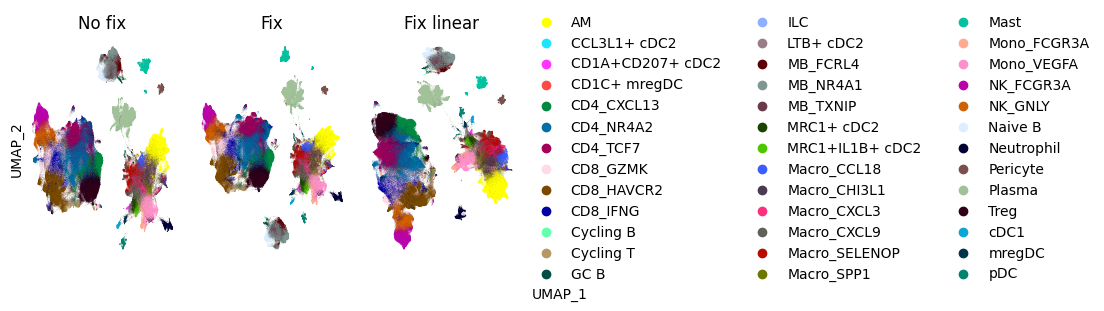

In [22]:
plot_latent_umaps( scanvi_model, model_fix,model_fix_linear, color="_prediction")

In [23]:
X_SCVI_KEY = "X_scvi"
X_SCANVI_NO_FIX_KEY = "X_scanvi_no_fix"
X_SCANVI_FIX_KEY = "X_scanvi_fix"
X_SCANVI_FIX_LINEAR_KEY = "X_scanvi_fix_linear"

adata.obsm[X_SCVI_KEY] = model.get_latent_representation()
adata.obsm[X_SCANVI_NO_FIX_KEY] = model_no_fix.get_latent_representation()
adata.obsm[X_SCANVI_FIX_KEY] = model_fix.get_latent_representation()
adata.obsm[X_SCANVI_FIX_LINEAR_KEY] = model_fix_linear.get_latent_representation()

In [24]:
adata

AnnData object with n_obs × n_vars = 594084 × 2000
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'tumor_nontumor_finer', 'minor', 'cell_type', 'celltype_fine', '_scvi_batch', '_scvi_labels', '_prediction'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', '_prediction_colors'
    obsm: 'X_scVI', '_latent', 'X_umap', 'X_scvi', 'X_scanvi_no_fix', 'X_scanvi_fix', 'X_scanvi_fix_linear'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [25]:
adata.write_h5ad('/home/data/sdzl14/NSCLC/zong/immune.scanvi.h5ad')

In [27]:
immune_scanvi = adata.copy()

In [28]:

immune = sc.read_h5ad("/home/data/sdzl14/NSCLC/zong/immune.h5ad")
immune = immune.copy()
print(immune_scanvi.obs['Dataset'].value_counts())
print(immune.obs['Dataset'].value_counts())
# 将多个数据集名称放入列表中
selected_datasets = ['Ansuman_Satpathy_2023', 'Goveia_Carmeliet_2020', 
       'He_Fan_2021', 'Kim_Lee_2020', 'Lambrechts_Thienpont_2018_6149v1',
       'Lambrechts_Thienpont_2018_6149v2', 'Lambrechts_Thienpont_2018_6653',
       'Laughney_Massague_2020', 'Maynard_Bivona_2020', 'Peng_Zhang_2024',
       'Tagore_S_2025', 'Travaglini_Krasnow_2020', 'UKIM-V',
       'Vieira_Teichmann_2019']
immune = immune[immune.obs['Dataset'].isin(selected_datasets)]

print(immune.obs['Dataset'].value_counts())
immune.layers['counts'] = immune.X.copy()

immune.obsm['X_scanvi_fix'] = immune_scanvi.obsm['X_scanvi_fix'].copy()
immune.obsm['X_scanvi_fix_linear'] = immune_scanvi.obsm['X_scanvi_fix_linear'].copy()
immune.obsm['X_scanvi_no_fix'] = immune_scanvi.obsm['X_scanvi_no_fix'].copy()
immune.obsm['X_scvi'] = immune_scanvi.obsm['X_scvi'].copy()
immune.obsm['X_umap'] = immune_scanvi.obsm['X_umap'].copy()
immune.obsm['_latent'] = immune_scanvi.obsm['_latent'].copy()
print(immune_scanvi.obs['_prediction'].value_counts())
print(immune_scanvi.obs['_scvi_batch'].value_counts())
immune.obs['immune_celltype'] = immune_scanvi.obs['_prediction'].copy()


Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Name: count, dtype: int64

Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Guo_Zhang_2018                        1779
Name: count, dtype: int64

Dataset
Ansuman_Satpathy_2023               189180
Peng_Zhang_2024                     151701
Kim_Lee_2020                         76979
Tagore_S_2025                        62514
He_Fan_2021                          37407
Lambrechts_Thienpont_2018_6149v2     24968
Lambrechts_Thienpont_2018_6653       15928
UKIM-V                                8963
Goveia_Carmeliet_2020                 8830
Maynard_Bivona_2020                   7593
Laughney_Massague_2020                3144
Lambrechts_Thienpont_2018_6149v1      2574
Travaglini_Krasnow_2020               2321
Vieira_Teichmann_2019                 1982
Name: count, dtype: int64

/tmp/ipykernel_2557852/628497022.py:15: ImplicitModificationWarning: Setting element `.layers['counts']` of view, initializing view as actual.
  immune.layers['counts'] = immune.X.copy()


_prediction
CD4_NR4A2           75710
CD4_TCF7            48022
CD8_HAVCR2          47624
AM                  44733
CD8_GZMK            40450
Treg                37956
Plasma              30431
CD4_CXCL13          24821
NK_GNLY             23723
CD8_IFNG            22948
MB_NR4A1            22289
NK_FCGR3A           20050
Mono_VEGFA          18789
Macro_SELENOP       17230
Macro_CHI3L1        16875
Macro_CXCL9         15452
Macro_CXCL3         11541
Macro_CCL18          8981
Mast                 8947
MB_TXNIP             7741
Neutrophil           7564
Macro_SPP1           6217
Cycling T            5265
Mono_FCGR3A          4756
Naive B              4654
MRC1+ cDC2           4137
MB_FCRL4             3535
Pericyte             3109
MRC1+IL1B+ cDC2      2934
pDC                  2027
cDC1                 1364
mregDC               1298
LTB+ cDC2             935
GC B                  790
CD1A+CD207+ cDC2      562
ILC                   265
Cycling B             200
CD1C+ mregDC          150
CCL3L1+ cDC2            9
Name: count, dtype: int64

_scvi_batch
0     189180
9     151701
3      76979
10     62514
2      37407
5      24968
6      15928
12      8963
1       8830
8       7593
7       3144
4       2574
11      2321
13      1982
Name: count, dtype: int64

In [36]:
immune

AnnData object with n_obs × n_vars = 594084 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'tumor_nontumor_finer', 'minor', 'cell_type', 'celltype_fine', 'immune_celltype', 'immune_celltype_coarse'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'immune_celltype_colors', 'immune_celltype_coarse_colors'
    obsm: 'X_scanvi_fix', 'X_scanvi_fix_linear', 'X_scanvi_no_fix', 'X_scvi', 'X_umap', '_latent'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [37]:
immune.write_h5ad('/home/data/sdzl14/NSCLC/zong/immune.scanvi.h5ad')

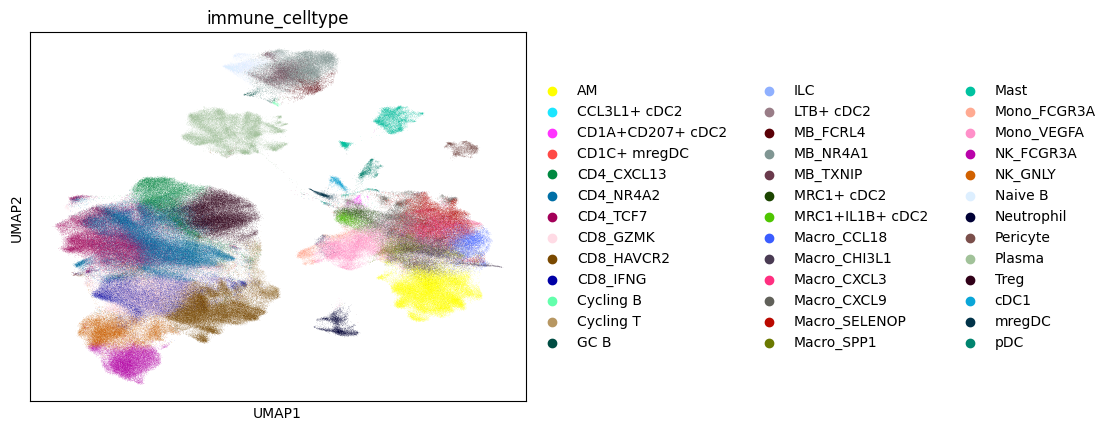

<Figure size 640x480 with 0 Axes>

In [31]:
sc.pp.normalize_total(immune, target_sum=1e4)
sc.pp.log1p(immune)
sc.pp.highly_variable_genes(
    immune,
    flavor="seurat",
    n_top_genes=2000,

    inplace=True,batch_key="Dataset")

sc.pp.scale(immune, max_value=10)
sc.pp.neighbors(immune, use_rep='X_scanvi_fix_linear',n_neighbors=35)
sc.tl.umap(immune,min_dist=0.5)
sc.pl.umap(immune,color=['immune_celltype'])
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/immune/immune_celltype.png',dpi = 300, bbox_inches='tight')
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/immune/immune_celltype.pdf',dpi = 300, bbox_inches='tight')

In [32]:
immune.obs['immune_celltype'].cat.categories

Index(['AM', 'CCL3L1+ cDC2', 'CD1A+CD207+ cDC2', 'CD1C+ mregDC', 'CD4_CXCL13',
       'CD4_NR4A2', 'CD4_TCF7', 'CD8_GZMK', 'CD8_HAVCR2', 'CD8_IFNG',
       'Cycling B', 'Cycling T', 'GC B', 'ILC', 'LTB+ cDC2', 'MB_FCRL4',
       'MB_NR4A1', 'MB_TXNIP', 'MRC1+ cDC2', 'MRC1+IL1B+ cDC2', 'Macro_CCL18',
       'Macro_CHI3L1', 'Macro_CXCL3', 'Macro_CXCL9', 'Macro_SELENOP',
       'Macro_SPP1', 'Mast', 'Mono_FCGR3A', 'Mono_VEGFA', 'NK_FCGR3A',
       'NK_GNLY', 'Naive B', 'Neutrophil', 'Pericyte', 'Plasma', 'Treg',
       'cDC1', 'mregDC', 'pDC'],
      dtype='object')

In [34]:
map ={'AM':'AM', 
      'CCL3L1+ cDC2':'cDC2', 
      'CD1A+CD207+ cDC2':'cDC2', 
      'CD1C+ mregDC':'mregDC', 
      'CD4_CXCL13':'CD4',
       'CD4_NR4A2':'CD4', 'CD4_TCF7':'CD4', 'CD8_GZMK':'CD4', 'CD8_HAVCR2':'CD8', 'CD8_IFNG':'CD8',
       'Cycling B':'Cycling B', 'Cycling T':'Cycling T', 'GC B':'GC B', 'ILC':'ILC', 'LTB+ cDC2':'cDC2', 'MB_FCRL4':'Memory B',
       'MB_NR4A1':'Memory B', 'MB_TXNIP':'Memory B', 'MRC1+ cDC2':'cDC2', 'MRC1+IL1B+ cDC2':'cDC2', 'Macro_CCL18':'Macro',
       'Macro_CHI3L1':'Macro', 'Macro_CXCL3':'Macro', 'Macro_CXCL9':'Macro', 'Macro_SELENOP':'Macro',
       'Macro_SPP1':'Macro', 'Mast':'Mast', 'Mono_FCGR3A':'Mono', 'Mono_VEGFA':'Mono', 'NK_FCGR3A':'NK',
       'NK_GNLY':'NK', 'Naive B':'Naive B', 'Neutrophil':'Neutrophil', 'Pericyte':'Pericyte', 'Plasma':'Plasma', 'Treg':'Treg',
       'cDC1':'cDC1', 'mregDC':'mregDC', 'pDC':'pDC'}
immune.obs['immune_celltype_coarse'] = immune.obs['immune_celltype'].map(map).astype('category')
immune.obs['immune_celltype_coarse'].value_counts()

immune_celltype_coarse
CD4           189003
Macro          76296
CD8            70572
AM             44733
NK             43773
Treg           37956
Memory B       33565
Plasma         30431
Mono           23545
Mast            8947
cDC2            8577
Neutrophil      7564
Cycling T       5265
Naive B         4654
Pericyte        3109
pDC             2027
mregDC          1448
cDC1            1364
GC B             790
ILC              265
Cycling B        200
Name: count, dtype: int64

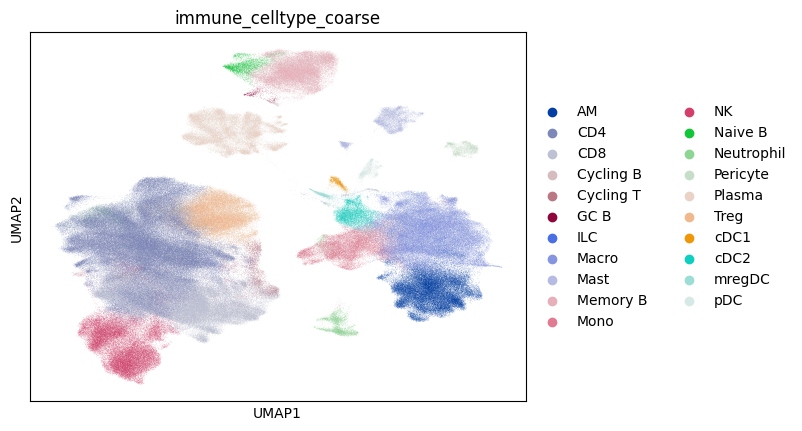

<Figure size 640x480 with 0 Axes>

In [35]:
sc.pl.umap(immune,color=['immune_celltype_coarse'])
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/immune/immune_celltype_coarse.png',dpi = 300, bbox_inches='tight')
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/immune/immune_celltype_coarse.pdf',dpi = 300, bbox_inches='tight')